In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
ruter_data = pd.read_csv('/Users/zulfeqarshiorzadeh/Desktop/AI-LAB/Assignment/Ruter-data.csv', sep=';')
ruter_data.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [24]:
df_150 = ruter_data[ruter_data["Linjenavn"] == "150"] # vil vi lagerer alle dataene far linje 150 til df_150

In [25]:
# Beregning av IQR for antall passasjerer
Q1 = ruter_data['Passasjerer_Ombord'].quantile(0.25)
Q3 = ruter_data['Passasjerer_Ombord'].quantile(0.75)
IQR = Q3 - Q1

# Definering av grenser for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifisering og fjerning av outliers
outliers = ruter_data[(ruter_data['Passasjerer_Ombord'] < lower_bound) | (ruter_data['Passasjerer_Ombord'] > upper_bound)]
outlier_indices = outliers.index

# Fjerne outliers fra datasettet
ruter_data_cleaned = ruter_data.drop(outlier_indices)


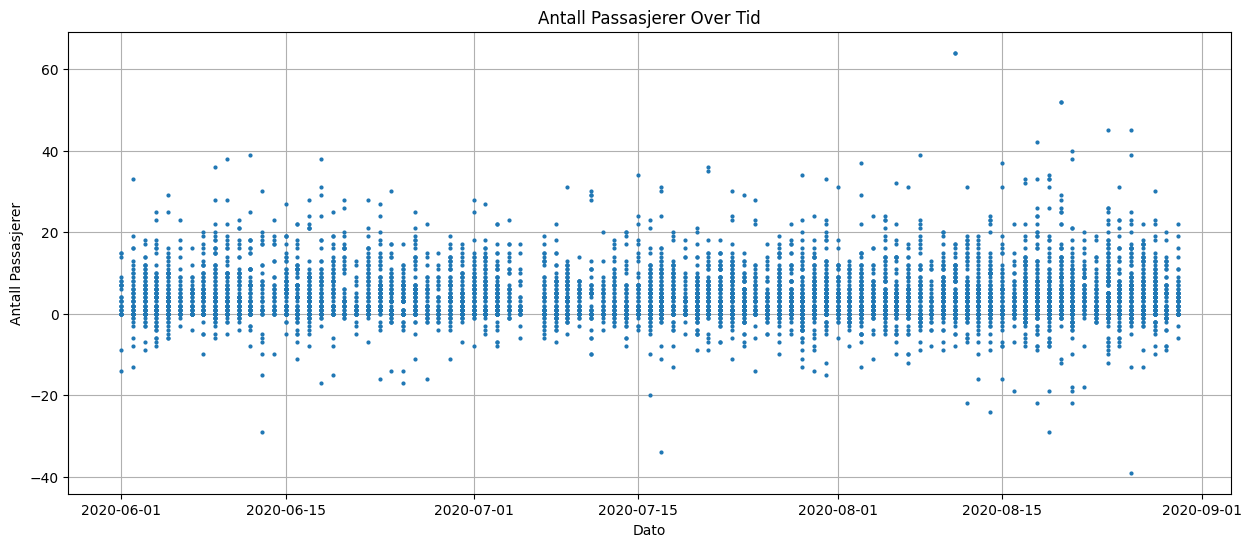

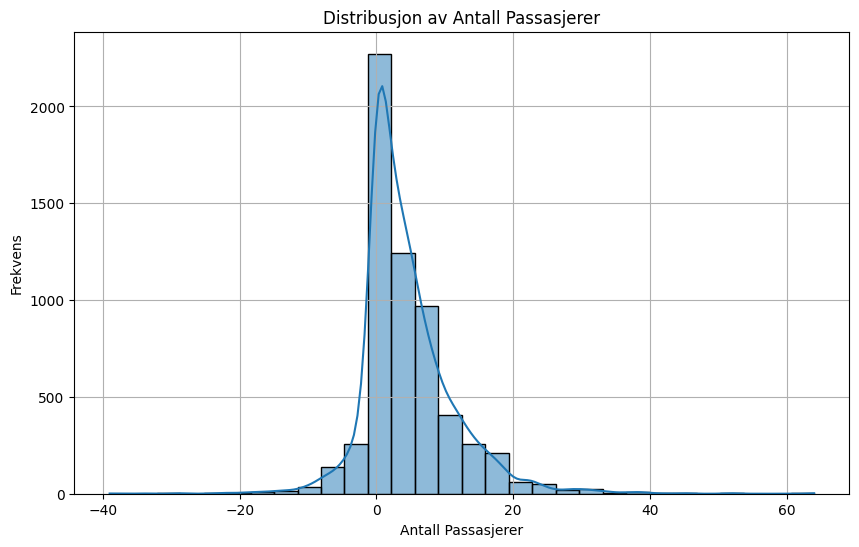

In [26]:

# Convert 'Dato' column to datetime and handle missing values
ruter_data['Dato'] = pd.to_datetime(ruter_data['Dato'], format='%d/%m/%Y', errors='coerce')
ruter_data.dropna(subset=['Dato'], inplace=True)

# Plotting the number of passengers over time
plt.figure(figsize=(15, 6))
plt.plot(ruter_data['Dato'], ruter_data['Passasjerer_Ombord'], marker='o', linestyle='', ms=2)
plt.title('Antall Passasjerer Over Tid')
plt.xlabel('Dato')
plt.ylabel('Antall Passasjerer')
plt.grid(True)
plt.show()

# Histogram of the number of passengers
plt.figure(figsize=(10, 6))
sns.histplot(ruter_data['Passasjerer_Ombord'], bins=30, kde=True)
plt.title('Distribusjon av Antall Passasjerer')
plt.xlabel('Antall Passasjerer')
plt.ylabel('Frekvens')
plt.grid(True)
plt.show()


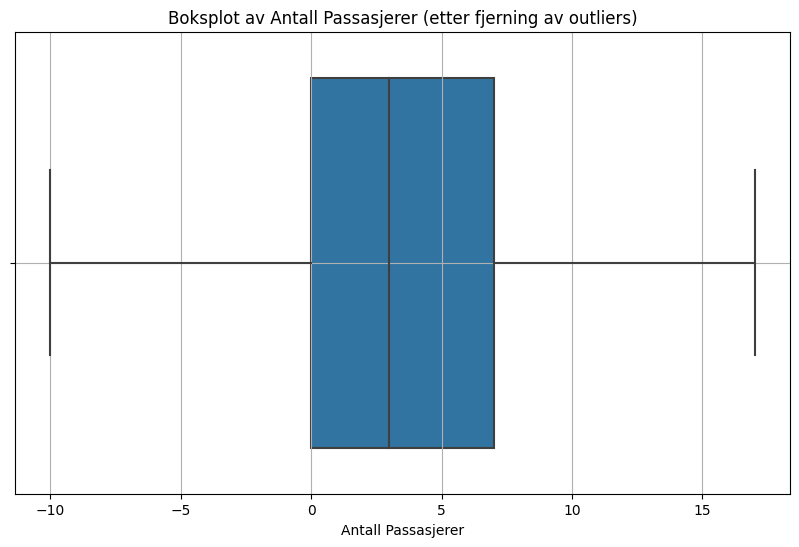

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ruter_data_cleaned['Passasjerer_Ombord'])
plt.title('Boksplot av Antall Passasjerer (etter fjerning av outliers)')
plt.xlabel('Antall Passasjerer')
plt.grid(True)
plt.show()

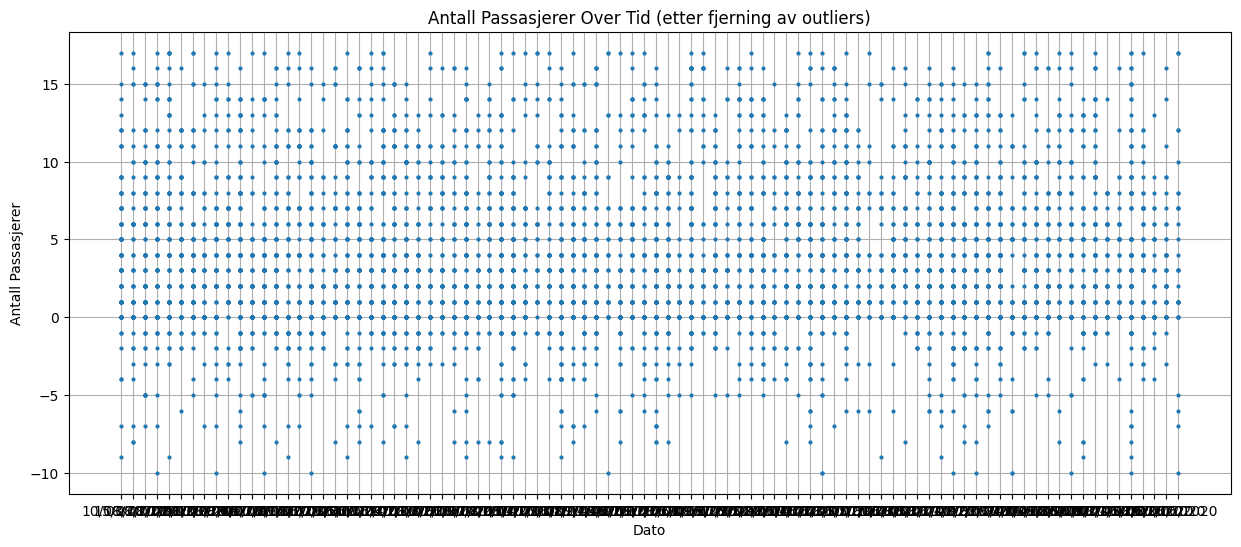

In [32]:
# Tidsrekkeplot av de rensete dataene
plt.figure(figsize=(15, 6))
plt.plot(ruter_data_cleaned['Dato'], ruter_data_cleaned['Passasjerer_Ombord'], marker='o', linestyle='', ms=2)
plt.title('Antall Passasjerer Over Tid (etter fjerning av outliers)')
plt.xlabel('Dato')
plt.ylabel('Antall Passasjerer')
plt.grid(True)
plt.show()

In [27]:
df_150['Dato'] = pd.to_datetime(df_150['Dato'], format='%d/%m/%Y') #her konverterer vi dato til en spesifikk format
start_date = df_150['Dato'].min() #her tar vi den eldeste eller tidligste (dato) datoen
df_150['Dager_siden_start'] = (df_150['Dato'] - start_date).dt.days #regener antall dager mellom hver dato

/var/folders/17/3fytsvds33x_ld4yxfdtt_3c0000gn/T/ipykernel_5225/3904651578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_150['Dato'] = pd.to_datetime(df_150['Dato'], format='%d/%m/%Y') #her konverterer vi dato til en spesifikk format
/var/folders/17/3fytsvds33x_ld4yxfdtt_3c0000gn/T/ipykernel_5225/3904651578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_150['Dager_siden_start'] = (df_150['Dato'] - start_date).dt.days #regener antall dager mellom hver dato


In [28]:
X = df_150[['Dager_siden_start']] #henter data og lagerer i x
y = df_150['Passasjerer_Ombord'] #henter data for passager i hver post

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # vi skal trene datasete vår via train_test_split, som bruker 20 prosent av data for testing

# Tren en lineær regresjonsmodell
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Prediker på testsettet
y_pred = model.predict(X_test)

# Evaluer modellen
mse = mean_squared_error(y_test, y_pred) #viser gjennonsnitlig feil i prosjektet
r2 = r2_score(y_test, y_pred)  #viser hvor godt prosjektet passer med den faktiske dataen jo nærmere 1 berty bedre
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 23.09
R^2 Score: -0.14


CHOICE OF ALGORITHM:

Given the task's requirement to predict the number of passengers on a specific date, I identified this as a regression problem. After considering the dataset and the need for simplicity in the solution, I chose linear regression as the most suitable algorithm. Linear regression provides a straightforward way to understand the relationship between dates and number of passengers, and is efficient for this type of dataset.